Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Load Data

In [2]:
df=pd.read_csv(r'c:\Users\ezath\Downloads\archive (9)\Mall_Customers.csv')

Show Data

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [6]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Data Cleaning

Check for Null Values

In [8]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Check for Duplicated Values

In [9]:
df.duplicated().sum()

np.int64(0)

Check for Outliers

In [10]:
numeric_cols = ['Spending Score (1-100)', 'Annual Income (k$)', 'Age']

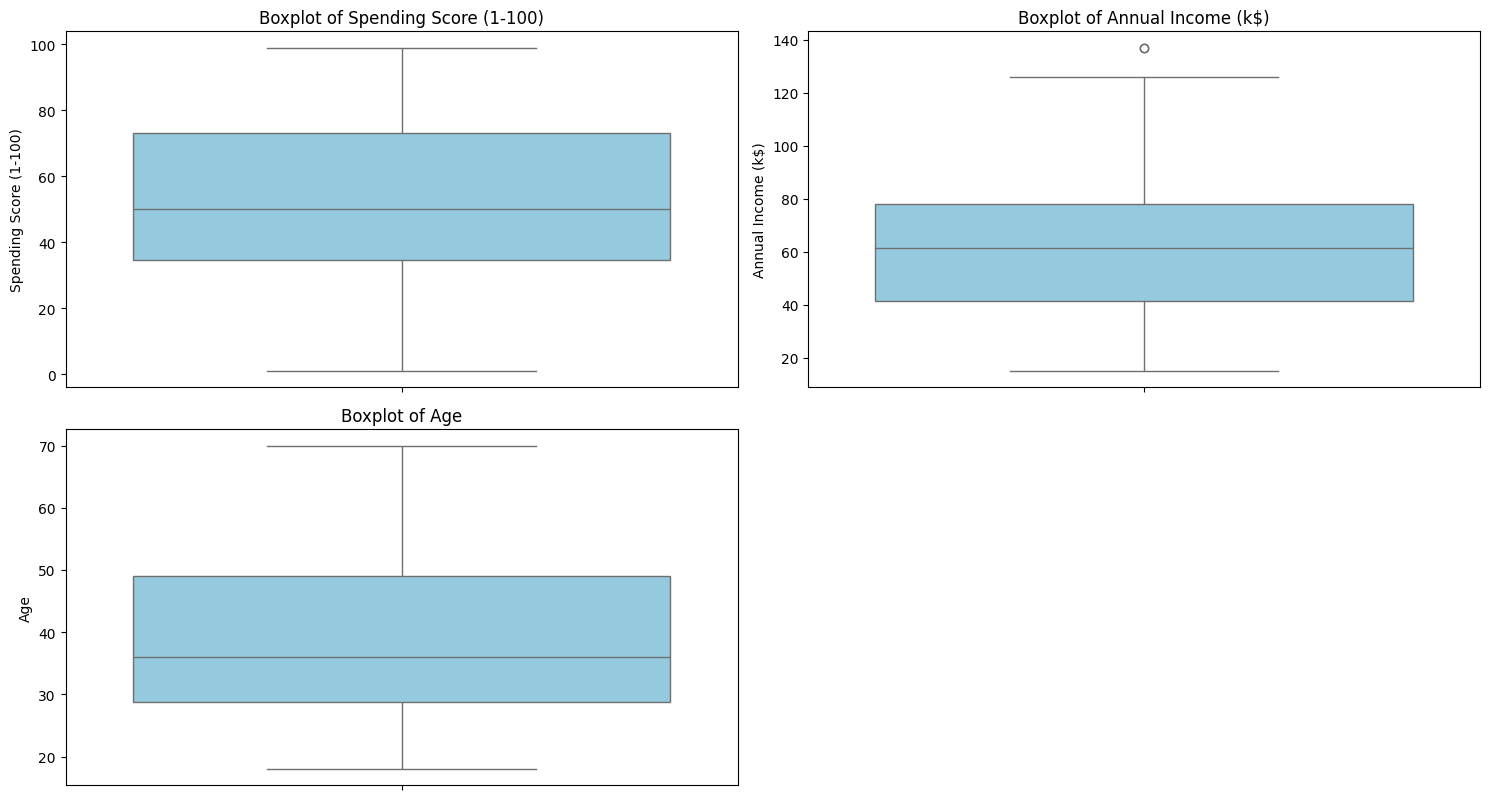

In [11]:
plt.figure(figsize=(15, 20))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

EDA Visualization

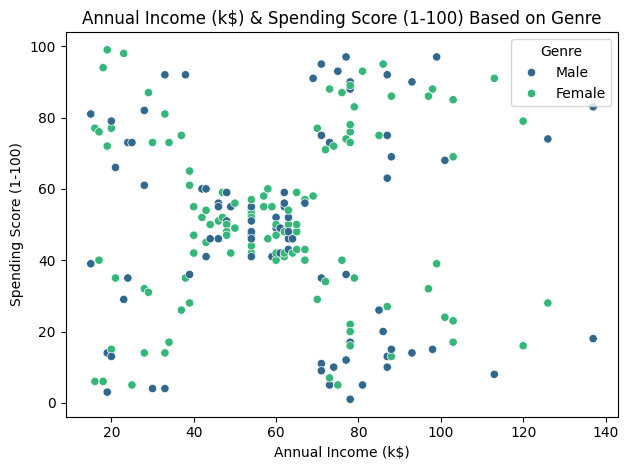

In [12]:
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],hue=df['Genre'],palette='viridis')
plt.title("Annual Income (k$) & Spending Score (1-100) Based on Genre")
plt.tight_layout()
plt.show()

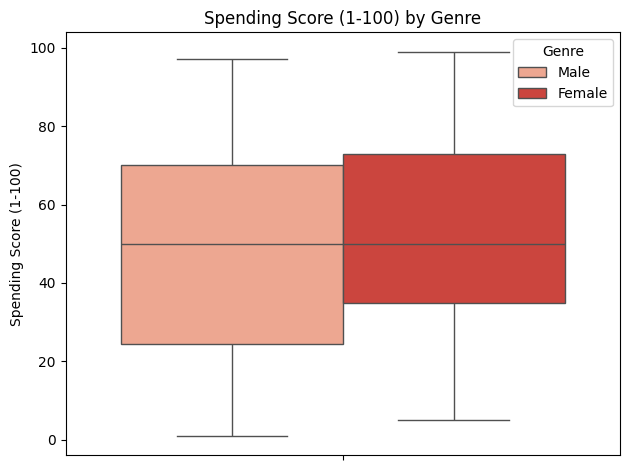

In [13]:
sns.boxplot(y=df['Spending Score (1-100)'],hue=df['Genre'],palette='Reds')
plt.title("Spending Score (1-100) by Genre")
plt.tight_layout()
plt.show()

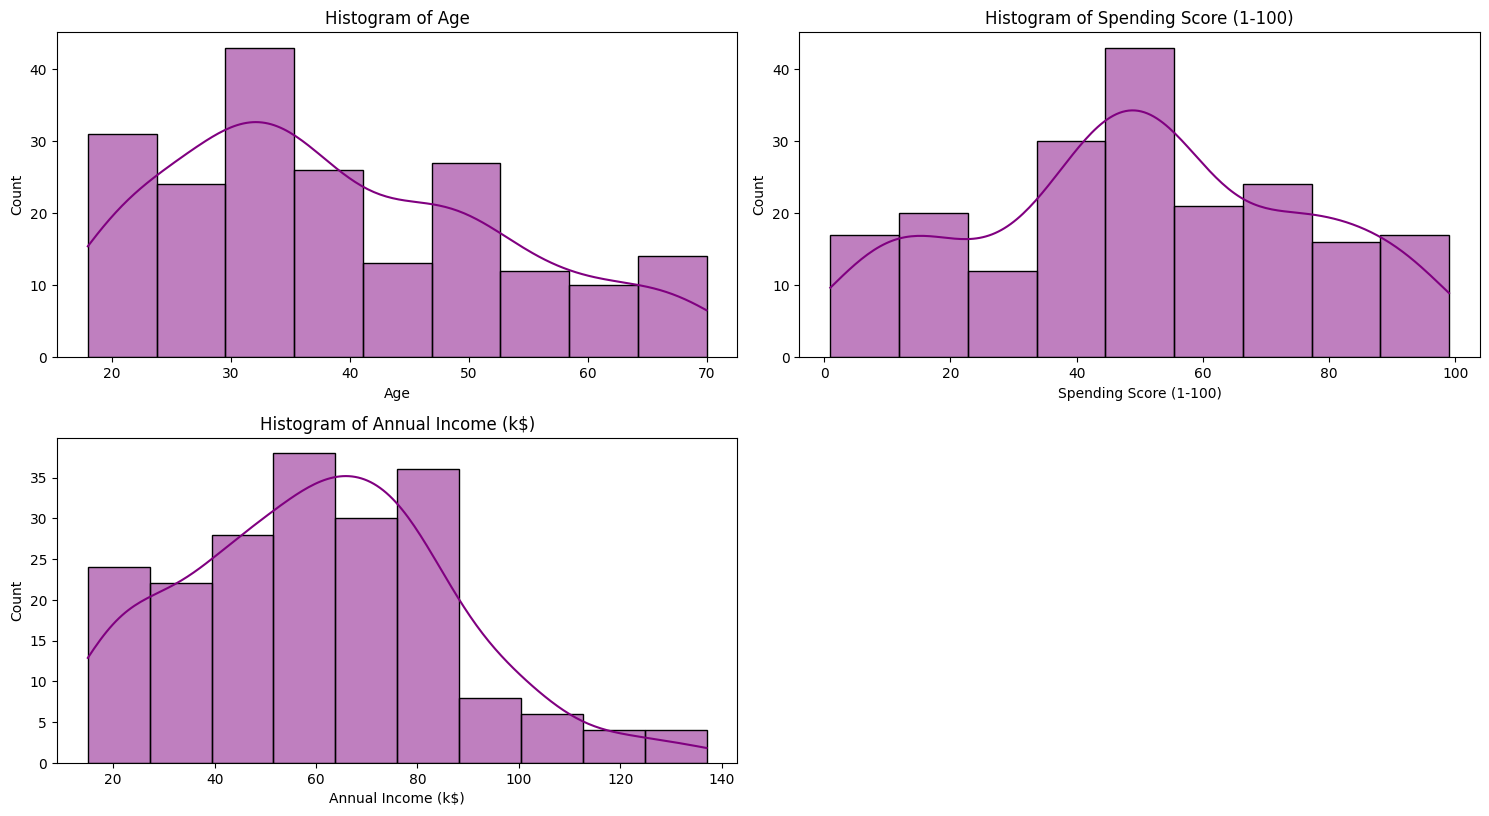

In [14]:
numeric_cols=['Age','Spending Score (1-100)','Annual Income (k$)']     
plt.figure(figsize=(15, 20))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(5, 2, i)
    sns.histplot(df[col], kde=True, color="purple")
    plt.title(f"Histogram of {col}")
plt.tight_layout()
plt.show()

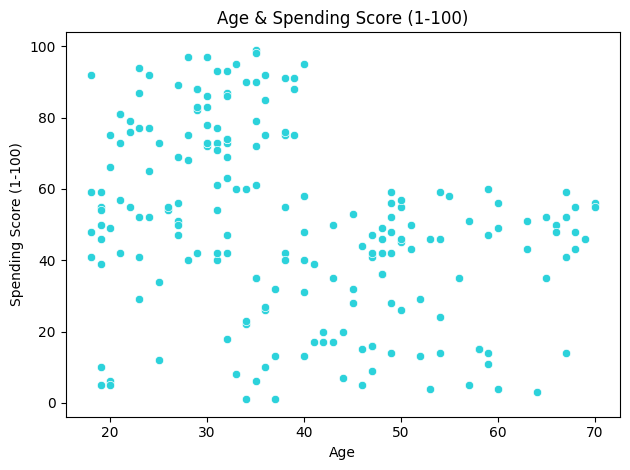

In [15]:
sns.scatterplot(x=df['Age'],y=df['Spending Score (1-100)'],color="#2cd2dbff")
plt.title("Age & Spending Score (1-100)")
plt.tight_layout()
plt.show()

Data Preprocessing

In [16]:
df=df.drop('CustomerID',axis=1)

OneHot Encoding

In [17]:
df=pd.get_dummies(df,columns=['Genre'],drop_first=True)
df['Genre_Male']=df['Genre_Male'].astype(int)

Scaling Data

In [18]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled=pd.DataFrame(df_scaled,columns=df.columns)

Training Model

In [19]:
inertia = []
K = range(1, 11)  
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

Elbow Method

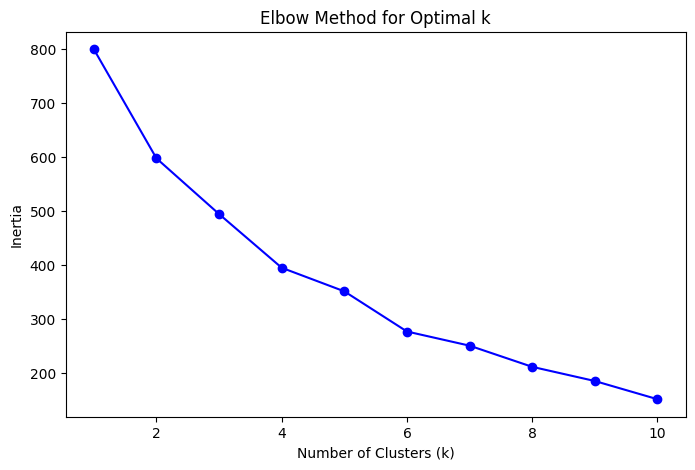

In [20]:
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

In [21]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male,Cluster
0,19,15,39,1,2
1,21,15,81,1,2
2,20,16,6,0,4
3,23,16,77,0,4
4,31,17,40,0,4


Customer Segments Visualization

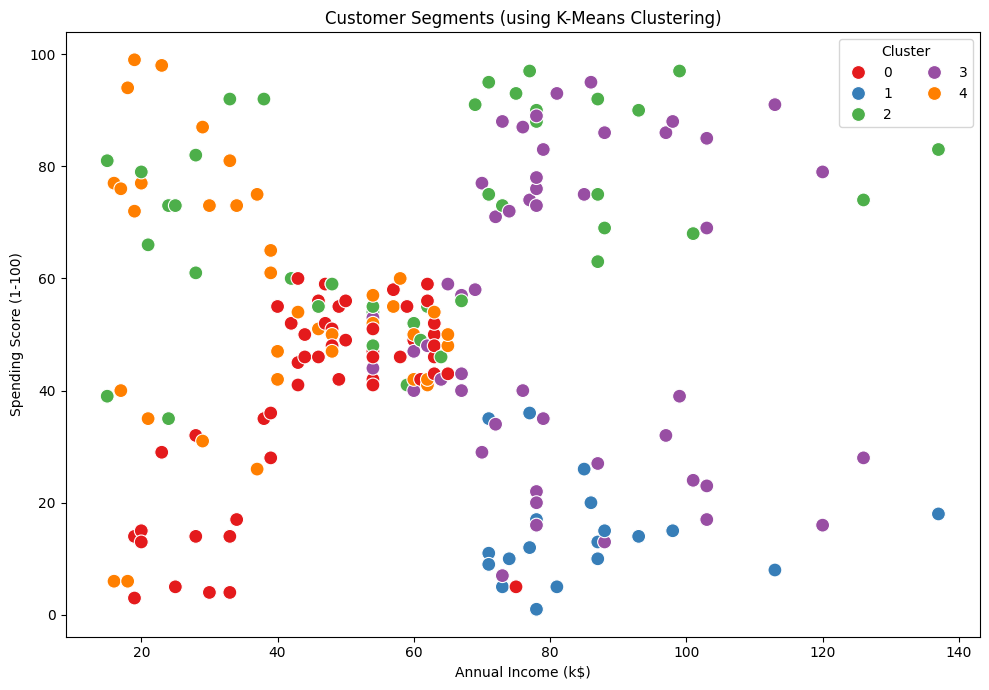

In [22]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],hue=df['Cluster'],palette='Set1',s=100)
plt.title("Customer Segments (using K-Means Clustering)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Cluster",loc='upper right',ncol=(3,3))
plt.tight_layout()
plt.show()

In [23]:
cluster_analysis = df.groupby('Cluster').mean(numeric_only=True)
print(cluster_analysis)

               Age  Annual Income (k$)  Spending Score (1-100)  Genre_Male
Cluster                                                                   
0        56.470588           46.098039               39.313725    0.509804
1        39.500000           85.150000               14.050000    1.000000
2        28.690476           60.904762               70.238095    1.000000
3        37.897959           82.122449               54.448980    0.000000
4        27.315789           38.842105               56.210526    0.000000


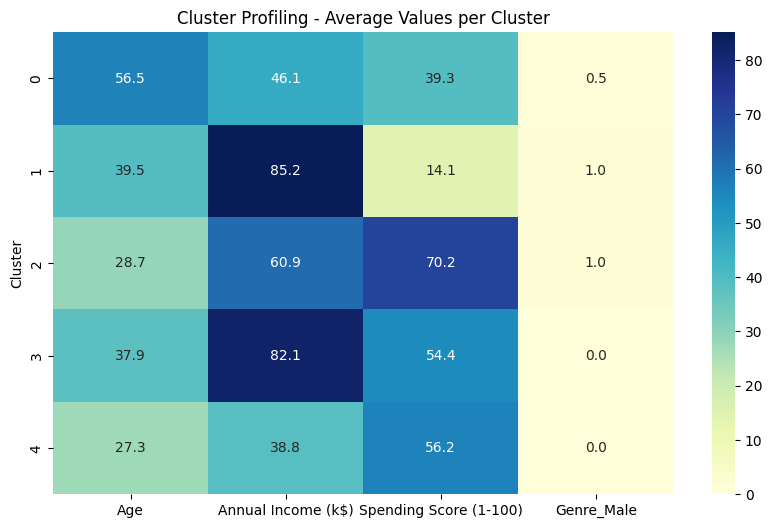

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(cluster_analysis, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("Cluster Profiling - Average Values per Cluster")
plt.show()

DBSCAN 

In [25]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)

DBSCAN Visualization

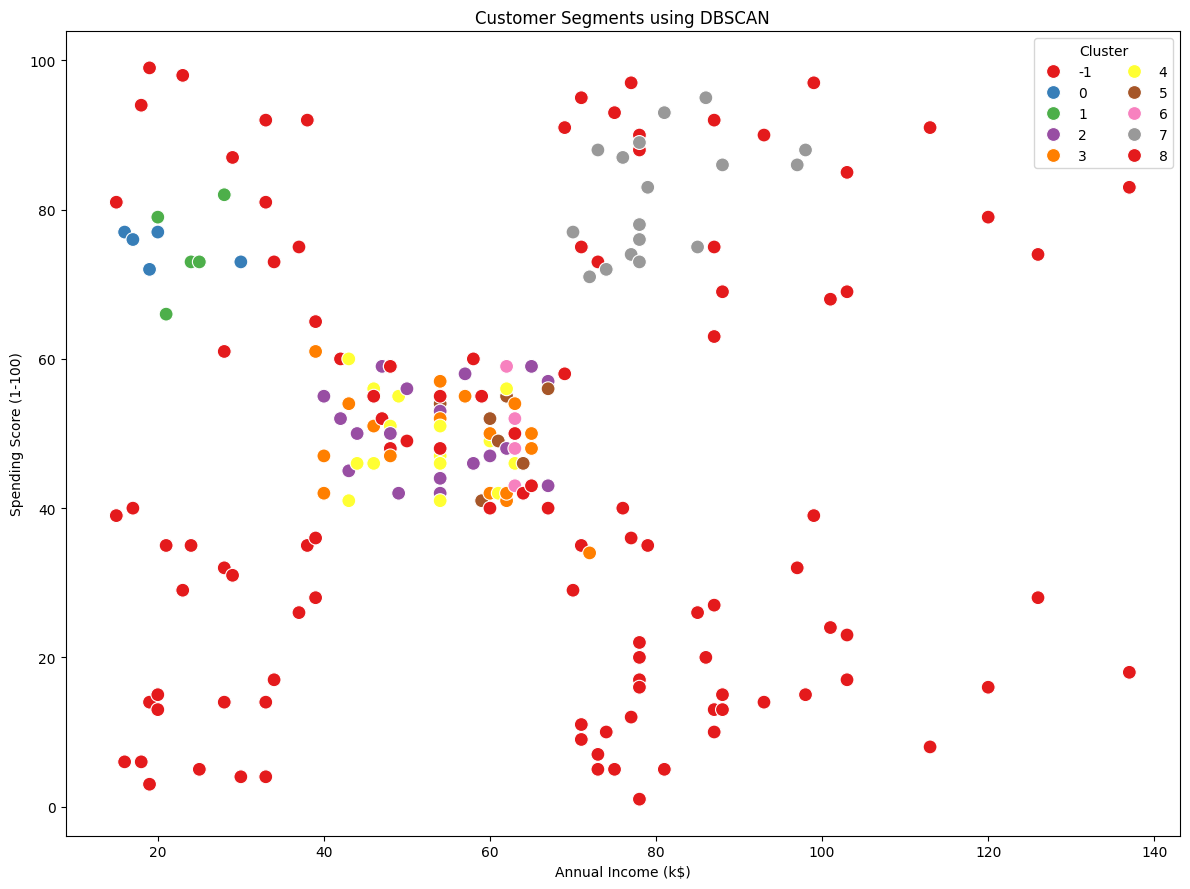

In [26]:
plt.figure(figsize=(12,9))
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],hue=df['DBSCAN_Cluster'],palette='Set1',s=100)
plt.title("Customer Segments using DBSCAN")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Cluster",loc='upper right',ncol=(2))
plt.tight_layout()
plt.show()

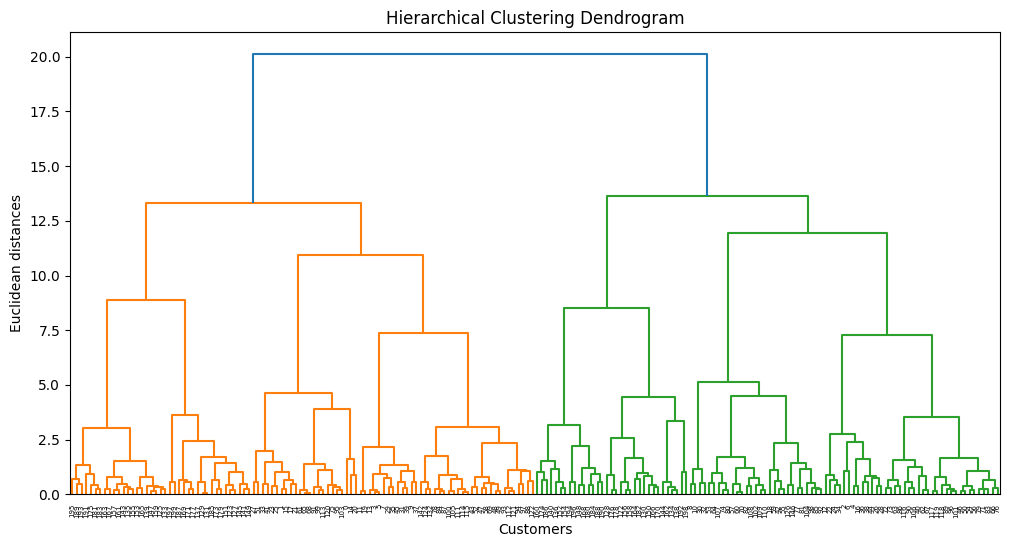

In [27]:
plt.figure(figsize=(12,6))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()

In [28]:
cluster_analysis = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']].mean()
print("Cluster Analysis (Average Values):")
print(cluster_analysis)

Cluster Analysis (Average Values):
         Annual Income (k$)  Spending Score (1-100)        Age
Cluster                                                       
0                 46.098039               39.313725  56.470588
1                 85.150000               14.050000  39.500000
2                 60.904762               70.238095  28.690476
3                 82.122449               54.448980  37.897959
4                 38.842105               56.210526  27.315789


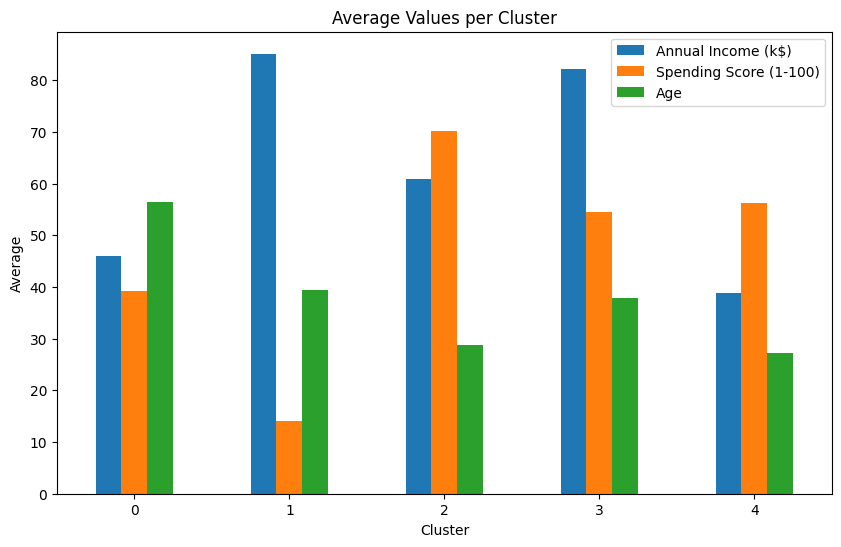

In [29]:
cluster_analysis.plot(kind='bar', figsize=(10,6))
plt.title("Average Values per Cluster")
plt.ylabel("Average")
plt.xticks(rotation=0)
plt.show()